# **GWU Doctoral Cyber Security Alaytics: Praxis Research**

# **A Holistic Approach to Enable Dynamic Policy Management for Zero Trust Architecture**

## Jody Spearing

## July 2025

## V3.5

##  **AHC Clustering Overview**

**Section 1:** Create Running Environment
*   Install / Import Libraries
*   Validate Runtime
* Load Data: create dataframe = df_0

**Section 2:** Basic Data Exploration on df_0

**Section 3:** Preprocessing on df_1

**Section 4:** Functions

**Section 5:** Model AHC Clusters

**Section 6:** Calculate Metrics

**Section 7:** Display Visualizations

**Section 8:** Analyze Results

# **Section 1: Install / Import Libraries**

In [1]:
######################################################################################################################
# Install Necessary Libraries
######################################################################################################################

#!apt-get -y install cuda
#!pip install pycuda # Moved before cuda-python
#!pip install cuda-python
#!pip install cudf-cu11
#!pip install cuml-cu11 dask-cuda --extra-index-url=https://pypi.nvidia.com
#!pip install --upgrade rmm
#!pip install cupy
#!pip install -U cupy-cuda11x
#!pip install -U cuml-cu11 dask-cuda --extra-index-url=https://pypi.nvidia.com
#!pip install -U --extra-index-url=https://pypi.nvidia.com \
#    cuml-cu11 dask-cuda --prefer-binary

######################################################################################################################
# Clean install first
######################################################################################################################

#!pip uninstall -y cuml cudf dask-cuda

# Install RAPIDS 24.02 for CUDA 12.0 (A100 compatible)
#!pip install -U \
#  --extra-index-url=https://pypi.nvidia.com \
#  cuml-cu12 \
#  cudf-cu12 \
#  dask-cuda \
#  --prefer-binary
######################################################################################################################
# Vaidate cuML
######################################################################################################################

#print("cuML version:", cuml.__version__)

In [1]:
######################################################################################################################
## Import Python libraries
######################################################################################################################

import pandas as pd
import numpy as np
from datetime import datetime
import time
import os

import tensorflow as tf
import torch
import gc

import cuml
from cuml.cluster import AgglomerativeClustering

from google.colab import drive
import logging
import cudf
import cupy as cp
from math import comb
from psutil import virtual_memory
from sklearn.model_selection import train_test_split


# Preprocessing Libraries
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

#Clustering libraries
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

#Clustering Metrics Libraries
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.neighbors import NearestNeighbors

from scipy.spatial.distance import cdist
from scipy.stats import entropy as scipy_entropy
from scipy.stats import entropy

# Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.sparse import csr_matrix

In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score,
    homogeneity_score, completeness_score, v_measure_score,
    roc_auc_score, average_precision_score, precision_score,
    recall_score, f1_score, confusion_matrix
)
from sklearn.preprocessing import LabelEncoder
from scipy.optimize import linear_sum_assignment
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score,
    homogeneity_score, completeness_score, v_measure_score,
    roc_auc_score, average_precision_score, precision_score,
    recall_score, f1_score, confusion_matrix, pairwise_distances
)
from scipy.sparse import hstack, csr_matrix
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix



# **Section 1: Validate Runtime**

In [2]:
######################################################################################################################
# check CUDA version
######################################################################################################################
!nvidia-smi

#Use cudf.pandas as a magic
#%load_ext cudf.pandas

Wed Jul 23 22:04:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             51W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

# **Section 1: Load Data: Original Dataframe = df_0**

In [3]:
######################################################################################################################
# get / set working directory
# List Contents of working directory
######################################################################################################################

# Check if drive is already mounted before attempting to mount again
# Use force_remount=True to remount if it is already mounted.
import os
if not os.path.exists('/content/gdrive'):

    drive.mount('/content/gdrive', force_remount=True)
else:
    print("Drive is already mounted.")

!ls "/content/gdrive/My Drive/GWU/Praxis"

Mounted at /content/gdrive
'A Holistic Approach to Enable Dynamic Policy Management for Zero Trust Architecture Implementations.docx'
'Copy of GWU_PRAXIS_FINAL_JSPEARING.gdoc'
'Copy of GWU_PRAXIS_FINAL_JSPEARINGvRedo2v10.gdoc'
'Copy of GWU_PRAXIS_FINAL_JSPEARINGvRedo2v6.gdoc'
'Copy of GWU_PRAXIS_FINAL_JSPEARINGvRedo2v7.gdoc'
'Copy of GWU_PRAXIS_FINAL_JSPEARINGvRedo2v8 (1).gdoc'
'Copy of GWU_PRAXIS_FINAL_JSPEARINGvRedo2v8.gdoc'
'Copy of GWU_PRAXIS_FINAL_JSPEARINGvRedo2v9.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_redo06262025v1.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_v0618F.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_v0618g.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_v0618h.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_v0621v3.gdoc'
'Copy of Spearing_Jody_Praxis_Draft5_v0621v6.gdoc'
'Copy of Spearing_Jody_Praxis_Draft8_redo06262025v1.gdoc'
'Copy of Spearing_Jody_Praxis_Draft9_redo06262025v1.gdoc'
'Copy of Spearing_Jody_Praxis_Draft_v05262025v6.docx'
'Copy of Spearing_Jody_Praxis_Draft_v05

In [4]:
######################################################################################################################
# Load Data file into dataframe 'df_0' denoting original
# Define the path to the Google Drive directory where the dataset is stored
# Define the name of the dataset file
# Combine the path and filename into a full path to the data file
# Optional: Limit the number of rows read for testing large files (commented out)
# nRowsRead random sample used for testing
# Read the CSV file into a pandas DataFrame
# Optionally, you could use nrows=nRowsRead for testing large datasets
# Print the first few rows of the DataFrame to verify that the file was read correctly
# Handle case where the file path is incorrect or file is missing
# Handle case where the CSV file has formatting issues and can't be parsed
# Catch any other unexpected exceptions and print the error message
######################################################################################################################

drive_path = '/content/gdrive/My Drive/GWU/Praxis/data/'
data = 'Dataset-Unicauca-Version2-87Atts 2.csv'

results_path = '/content/gdrive/My Drive/GWU/Praxis/results/'
results_data = 'AHC_Results20250506_184706.csv'
data_file = drive_path + data
results_data_file = results_path + results_data
#nRowsRead = 1_000_000
nRowsRead = 100_000

df_0 = pd.read_csv(data_file)
df_sampled = df_0.sample(n=nRowsRead, random_state=42)

#try:
#  print(data_file)
#  df_0 = pd.read_csv(data_file)
#  results_df = pd.read_csv(results_data_file)

  # Load random Sample
#  df_sampled = df_0.sample(n=nRowsRead, random_state=42)

print(df_0.shape)
print(df_sampled.shape)

#print(df.head()) # Print the first few rows to verify

#print(results_df.shape)
#print(results_df.head())

#except FileNotFoundError:
#  print(f"Error: File not found at {data_file}")
# except pd.errors.ParserError:
#  print(f"Error: Unable to parse the file at {data_file}. Check file format.")
# except Exception as e:
#  print(f"An unexpected error occurred: {e}")


(3577296, 87)
(100000, 87)


In [5]:
######################################################################################################################
# Write results csv file to drive
######################################################################################################################

def write_labeled_df_tocsv_timestamp(output_file, output_dir, timestamp):

  try:
    print("Writing the file to ..." + output_dir)
    df_0.to_csv(output_path, index=False)
    print(f"Dataset written with shape: {df_0.shape}")

  except FileNotFoundError:
      print(f"Error: File not found at {output_dir}")
      return []
  except pd.errors.ParserError:
      print(f"Error: Unable to parse the file at {output_dir}. Check the file format.")
      return []
  except Exception as e:
      print(f"An unexpected error occurred: {e}")
      return []

In [6]:
######################################################################################################################
#df = df_0.copy()
######################################################################################################################

df = df_sampled.copy()
df.shape

(100000, 87)

In [ ]:
#metrics = {
#        'Encoding Type': encoding_type,
#        'n_clusters': n_clusters,
#        'Silhouette Score': silhouette,
#        'Davies-Bouldin Index': davies_bouldin,
#        'Calinski-Harabasz Index': calinski_harabasz,
#        'Fowlkes-Mallows Index (FMI)': fowlkes_mallows,
#        'Entropy': cluster_entropy,
#        'Coherence': coherence,
#        'Avg Intra-Cluster Distance': avg_intra,
#        'Noise Points': noise_count,
#        'Noise Ratio': noise_count / total_count,
#        'Core Point Ratio': np.sum(labels != -1) / total_count,
#        'Inertia': inertia,
#        'Adjusted Rand Index (ARI)': adjusted_rand,
#        'Normalized Mutual Information (NMI)': normalized_mutual_info,
#        'Homogeneity': homogeneity,
#        'Completeness': completeness,
#        'V-measure': v_measure,
#        'True Positives (TP)': tp,
#        'True Negatives (TN)': tn,
#        'False Positives (FP)': fp.sum(),
#        'False Negatives (FN)': fn.sum(),
#        'True Postitive Rate (TPR)': tp / (tp + fn),
#        'False Positive Rate (FPR)': fp / (fp + tn),
#        'True Negative Rate (TNR)': tn / (tn + fp),
#        'False Negative Rate (FNR)': fn / (fn + tp),
#        'Precision': tp / (tp + fp),
#        'Recall': tp / (tp + fn),
#        'ROC AUC': roc_auc,
#        'PR AUC': pr_auc,
#        'F1 Score': f1_score
#    }

In [27]:
######################################################################################################################
# Visualization of Heatmap
# Define a function to plot a heatmap of clustering performance metrics across encoding types
# Parameters:
# - results_df: DataFrame containing clustering results and metrics
# - metrics_to_plot: list of metric names to include in the heatmap (optional)
# If no specific metrics are provided, use a default subset of key metrics
# Group the results by Encoding Type and compute the mean of the selected metrics
# Set the size of the figure for the heatmap
# Create the heatmap using seaborn
# - annot=True shows the metric values inside the cells
# - fmt=".2f" formats numbers to 2 decimal places
# - cmap sets the color map (YlGnBu: Yellow-Green-Blue)
######################################################################################################################

# === Heatmap plot ===
def plot_heatmap(results_df, metrics_to_plot=None):
    if metrics_to_plot is None:
        metrics_to_plot = [
            'Silhouette Score',
            'Davies-Bouldin Index',
            'Calinski-Harabasz Index',
            'Noise Ratio',
            'Core Point Ratio',
            'Avg Intra-Cluster Distance'
        ]
    df_plot = results_df.reset_index()
    df_plot[['Set', 'Encoding']] = df_plot['index'].str.extract(r'(\w+) \((.+)\)')
    for metric in metrics_to_plot:
        df_plot[metric] = pd.to_numeric(df_plot[metric], errors='coerce')
    grouped = df_plot.groupby('Encoding')[metrics_to_plot].mean().astype(float)
    plt.figure(figsize=(10, 6))
    sns.heatmap(grouped, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title("Clustering Metrics by Encoding Type (Averaged Across Splits)")
    plt.ylabel("Encoding Type")
    plt.xlabel("Metric")
    plt.tight_layout()
    plt.show()

In [28]:
######################################################################################################################
# === Cluster visualization ===
######################################################################################################################

def plot_clusters(data_scaled, labels, grid_size, encoding_type, split_label="Train"):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data_scaled[:len(labels)])
    clustered_df = pd.DataFrame({
        'Cluster': labels,
        'PCA1': reduced_data[:, 0],
        'PCA2': reduced_data[:, 1]
    })
    plt.figure(figsize=(10, 6))
    for cluster in sorted(clustered_df['Cluster'].unique()):
        subset = clustered_df[clustered_df['Cluster'] == cluster]
        plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', alpha=0.6)
    plt.title(f'Cluster Visualization - {encoding_type} ({split_label}) | Grid: {grid_size[0]}x{grid_size[1]}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Cluster')
    plt.tight_layout()
    plt.show()

In [29]:
######################################################################################################################
# Visualization of Metrics Function
# Define a function to create a bar chart of clustering metrics across encoding types
# Parameters:
# - results_df: DataFrame containing clustering results and metrics
# - sort_by: metric to sort the bars by (default is 'Silhouette Score')
# Sort the results by the selected metric in descending order and set 'Encoding Type' as the index
# Plot the DataFrame as a bar chart
# Customize chart title and axis labels
# Rotate x-axis labels for better readability
# Place legend in the upper-left corner
# Adjust layout to fit elements nicely
# Show the plot
######################################################################################################################


def plot_metrics(results_df, sort_by='Silhouette Score'):
    # Reset index to expose 'Train/Test/Validation (Encoder)' as a column
    df_plot = results_df.reset_index()

    # Extract 'Set' and 'Encoder' from the index
    df_plot[['Set', 'Encoding']] = df_plot['index'].str.extract(r'(\w+)\s+\((.+)\)')

    # Pivot to make 'Encoding' the x-axis and show bars by 'Set'
    pivot = df_plot.pivot(index='Encoding', columns='Set', values=sort_by)

    # Plot
    pivot.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{sort_by} by Encoding Type and Data Split')
    plt.ylabel(sort_by)
    plt.xlabel('Encoding Type')
    plt.xticks(rotation=0)
    plt.legend(title='Data Split', loc='upper right')
    plt.tight_layout()
    plt.show()

In [62]:
def evaluate_split(X, labels, df_split, encoding_name, split_name, n_clusters):
    from sklearn.preprocessing import LabelEncoder
    from sklearn.metrics import (
        silhouette_score, calinski_harabasz_score, davies_bouldin_score,
        adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score,
        homogeneity_score, completeness_score, v_measure_score,
        roc_auc_score, average_precision_score, precision_score,
        recall_score, f1_score, confusion_matrix
    )
    from scipy.optimize import linear_sum_assignment
    import numpy as np
    import pandas as pd
    import warnings

    def align_clusters_to_labels(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        row_ind, col_ind = linear_sum_assignment(-cm)
        mapping = dict(zip(col_ind, row_ind))
        return np.vectorize(mapping.get)(y_pred)

    # === Prepare labels ===
    try:
        if 'Label' not in df_split.columns:
            raise ValueError(f"'Label' column not found in {split_name}")
        true_labels_raw = df_split['Label'].astype(str).values
        le = LabelEncoder()
        true_labels = le.fit_transform(true_labels_raw)
        n_classes = len(np.unique(true_labels))
        if n_classes > 2:
            warnings.warn(f"[{split_name}] Supervised metrics skipped: true labels are not binary (classes={np.unique(true_labels)}).")
            true_labels = None
    except Exception as e:
        warnings.warn(f"[{split_name}] Label processing error: {e}")
        true_labels = None

    # === Unsupervised metrics ===
    silhouette = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)
    chi = calinski_harabasz_score(X, labels)
    entropy_val = cluster_entropy(labels)
    coherence_val = coherence_score(X, labels)
    inter_dist = avg_inter_cluster_distance(X, labels)

    # === Supervised metrics (initialize)
    metrics = {
        'Adjusted Rand Index (ARI)': np.nan,
        'Normalized Mutual Information (NMI)': np.nan,
        'Fowlkes-Mallows Index (FMI)': np.nan,
        'Homogeneity': np.nan,
        'Completeness': np.nan,
        'V-measure': np.nan,
        'ROC AUC': np.nan,
        'PR AUC': np.nan,
        'Precision': np.nan,
        'Recall': np.nan,
        'F1 Score': np.nan,
        'True Positives (TP)': np.nan,
        'True Negatives (TN)': np.nan,
        'False Positives (FP)': np.nan,
        'False Negatives (FN)': np.nan,
        'True Positive Rate (TPR)': np.nan,
        'False Positive Rate (FPR)': np.nan,
        'True Negative Rate (TNR)': np.nan,
        'False Negative Rate (FNR)': np.nan,
    }

    if true_labels is not None:
        try:
            aligned_labels = align_clusters_to_labels(true_labels, labels)

            # supervised clustering metrics
            metrics.update({
                'Adjusted Rand Index (ARI)': adjusted_rand_score(true_labels, labels),
                'Normalized Mutual Information (NMI)': normalized_mutual_info_score(true_labels, labels),
                'Fowlkes-Mallows Index (FMI)': fowlkes_mallows_score(true_labels, labels),
                'Homogeneity': homogeneity_score(true_labels, labels),
                'Completeness': completeness_score(true_labels, labels),
                'V-measure': v_measure_score(true_labels, labels),
            })

            # binary classification metrics only if 2x2 confusion matrix
            cm = confusion_matrix(true_labels, aligned_labels)
            if cm.shape == (2, 2):
                tn, fp, fn, tp = cm.ravel()
                metrics.update({
                    'ROC AUC': roc_auc_score(true_labels, aligned_labels),
                    'PR AUC': average_precision_score(true_labels, aligned_labels),
                    'Precision': precision_score(true_labels, aligned_labels),
                    'Recall': recall_score(true_labels, aligned_labels),
                    'F1 Score': f1_score(true_labels, aligned_labels),
                    'True Positives (TP)': tp,
                    'True Negatives (TN)': tn,
                    'False Positives (FP)': fp,
                    'False Negatives (FN)': fn,
                    'True Positive Rate (TPR)': tp / (tp + fn),
                    'False Positive Rate (FPR)': fp / (fp + tn),
                    'True Negative Rate (TNR)': tn / (tn + fp),
                    'False Negative Rate (FNR)': fn / (fn + tp),
                })
            else:
                warnings.warn(f"[{split_name}] Skipping TPR/F1/etc — confusion matrix is not 2x2: shape={cm.shape}")
        except Exception as e:
            warnings.warn(f"[{split_name}] Error computing classification metrics: {e}")

    # === Return full results
    result = {
        'Encoding Type': encoding_name,
        'Set': split_name,
        'n_clusters': n_clusters,
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': dbi,
        'Calinski-Harabasz Index': chi,
        'Entropy': entropy_val,
        'Coherence': coherence_val,
        'Avg Inter-Cluster Distance': inter_dist,
        'Noise Points': 0,
        'Noise Ratio': 0.0,
        'Core Point Ratio': 1.0,
        'Inertia': np.nan
    }
    result.update(metrics)
    return pd.DataFrame([result])

In [63]:
def run_ahc_and_evaluate(X_train, X_test, X_val, encoding_name, df_train, df_test, df_val):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels_train = model.fit_predict(X_train)
    labels_test = model.fit_predict(X_test)
    labels_val = model.fit_predict(X_val)

    # Evaluate each split
    results = []
    for X, labels, df, name in zip(
        [X_train, X_test, X_val],
        [labels_train, labels_test, labels_val],
        [df_train, df_test, df_val],
        ['Train', 'Test', 'Validation']
    ):
        df_result = evaluate_split(X, labels, df, encoding_name, name, n_clusters)
        if not df_result.empty:
            results.append(df_result)

    return pd.concat(results, ignore_index=True) if results else pd.DataFrame()

In [64]:
# === Encoders ===
def encode_featurehasher(df_subset):
    hasher = FeatureHasher(n_features=n_features, input_type='string')
    hashed = hasher.transform(df_subset[categorical_cols].astype(str).to_dict(orient='records'))
    numeric = df_subset[numeric_cols].fillna(0).values
    return hstack([hashed, csr_matrix(numeric)])

In [65]:
def encode_labelencoder(df_subset):
    df_encoded = df_subset.copy()
    for col in categorical_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    return df_encoded[numeric_cols + categorical_cols].fillna(0).values

In [66]:
# === Dimensionality Reduction and Scaling ===
def reduce_and_scale(X_train, X_test, X_val, requested_svd_components=20):
    max_components = min(requested_svd_components, X_train.shape[1])
    svd = TruncatedSVD(n_components=max_components, random_state=42)
    scaler = StandardScaler()
    X_train_reduced = svd.fit_transform(X_train)
    X_test_reduced = svd.transform(X_test)
    X_val_reduced = svd.transform(X_val)
    X_train_scaled = scaler.fit_transform(X_train_reduced)
    X_test_scaled = scaler.transform(X_test_reduced)
    X_val_scaled = scaler.transform(X_val_reduced)
    return X_train_scaled, X_test_scaled, X_val_scaled

In [67]:
# === Extra Metrics ===
def avg_inter_cluster_distance(X, labels):
    centroids = []
    for label in np.unique(labels):
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            centroid = np.mean(cluster_points, axis=0)
            centroids.append(centroid)
    return np.mean(pairwise_distances(centroids)) if len(centroids) > 1 else np.nan

In [68]:
def coherence_score(X, labels):
    scores = []
    for label in np.unique(labels):
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            centroid = cluster_points.mean(axis=0)
            distances = pairwise_distances(cluster_points, [centroid])
            scores.append(np.mean(distances))
    return np.mean(scores) if scores else np.nan

In [69]:
def cluster_entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probs = counts / counts.sum()
    return entropy(probs)

In [70]:
# === Visualization ===
def plot_metrics(results_df, sort_by='Silhouette Score'):
    df_plot = results_df.copy()
    pivot = df_plot.pivot(index='Encoding Type', columns='Set', values=sort_by)
    pivot.plot(kind='bar', figsize=(12, 6))
    plt.title(f'{sort_by} by Encoding Type and Data Split')
    plt.ylabel(sort_by)
    plt.xlabel('Encoding Type')
    plt.xticks(rotation=0)
    plt.legend(title='Data Split', loc='upper right')
    plt.tight_layout()
    plt.show()

In [71]:
# === Parameters ===
categorical_cols = ['Source.IP', 'ProtocolName']
numeric_cols = ['Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets']
n_features = 64
n_clusters = 10

# === Main Execution ===
def main(df):
    df_train, df_temp = train_test_split(df, test_size=0.3, random_state=42)
    df_test, df_val = train_test_split(df_temp, test_size=1/3, random_state=42)

    # LabelEncoder
    X_train_le = encode_labelencoder(df_train)
    X_test_le = encode_labelencoder(df_test)
    X_val_le = encode_labelencoder(df_val)
    X_train_le_scaled, X_test_le_scaled, X_val_le_scaled = reduce_and_scale(X_train_le, X_test_le, X_val_le)
    results_le = run_ahc_and_evaluate(X_train_le_scaled, X_test_le_scaled, X_val_le_scaled, "LabelEncoder", df_train, df_test, df_val)

    # FeatureHasher
    X_train_fh = encode_featurehasher(df_train)
    X_test_fh = encode_featurehasher(df_test)
    X_val_fh = encode_featurehasher(df_val)
    X_train_fh_scaled, X_test_fh_scaled, X_val_fh_scaled = reduce_and_scale(X_train_fh, X_test_fh, X_val_fh)
    results_fh = run_ahc_and_evaluate(X_train_fh_scaled, X_test_fh_scaled, X_val_fh_scaled, "FeatureHasher", df_train, df_test, df_val)

    # Combine results
    combined_results = pd.concat([results_le, results_fh]).reset_index(drop=True)
    print(combined_results)

    # Visualizations
    plot_metrics(combined_results, sort_by='Silhouette Score')
    plot_metrics(combined_results, sort_by='Adjusted Rand Index (ARI)')
    plot_metrics(combined_results, sort_by='Avg Inter-Cluster Distance')
    return combined_results


# combined_results = main(df)

/tmp/ipython-input-62-4285220135.py:101: UserWarning: [Train] Skipping TPR/F1/etc — confusion matrix is not 2x2: shape=(10, 10)
  warnings.warn(f"[{split_name}] Skipping TPR/F1/etc — confusion matrix is not 2x2: shape={cm.shape}")
/tmp/ipython-input-62-4285220135.py:101: UserWarning: [Test] Skipping TPR/F1/etc — confusion matrix is not 2x2: shape=(10, 10)
  warnings.warn(f"[{split_name}] Skipping TPR/F1/etc — confusion matrix is not 2x2: shape={cm.shape}")
/tmp/ipython-input-62-4285220135.py:101: UserWarning: [Validation] Skipping TPR/F1/etc — confusion matrix is not 2x2: shape=(10, 10)
  warnings.warn(f"[{split_name}] Skipping TPR/F1/etc — confusion matrix is not 2x2: shape={cm.shape}")
/tmp/ipython-input-62-4285220135.py:101: UserWarning: [Train] Skipping TPR/F1/etc — confusion matrix is not 2x2: shape=(10, 10)
  warnings.warn(f"[{split_name}] Skipping TPR/F1/etc — confusion matrix is not 2x2: shape={cm.shape}")
/tmp/ipython-input-62-4285220135.py:101: UserWarning: [Test] Skipping TP

   Encoding Type         Set  n_clusters  Silhouette Score  \
0   LabelEncoder       Train          10          0.511976   
1   LabelEncoder        Test          10          0.460482   
2   LabelEncoder  Validation          10          0.437309   
3  FeatureHasher       Train          10          0.819488   
4  FeatureHasher        Test          10          0.778372   
5  FeatureHasher  Validation          10          0.756980   

   Davies-Bouldin Index  Calinski-Harabasz Index   Entropy  Coherence  \
0              0.840246             30378.388719  1.623362   7.537078   
1              0.664824             36641.927222  1.442882   5.189402   
2              0.826749              5733.759896  1.511517   3.071221   
3              0.738395            102695.376356  0.817245  14.428629   
4              0.441634            130527.696749  0.878569   6.009536   
5              0.412890             25103.376604  0.995141   2.602109   

   Avg Inter-Cluster Distance  Noise Points  ...  Rec

/tmp/ipython-input-62-4285220135.py:101: UserWarning: [Validation] Skipping TPR/F1/etc — confusion matrix is not 2x2: shape=(10, 10)
  warnings.warn(f"[{split_name}] Skipping TPR/F1/etc — confusion matrix is not 2x2: shape={cm.shape}")


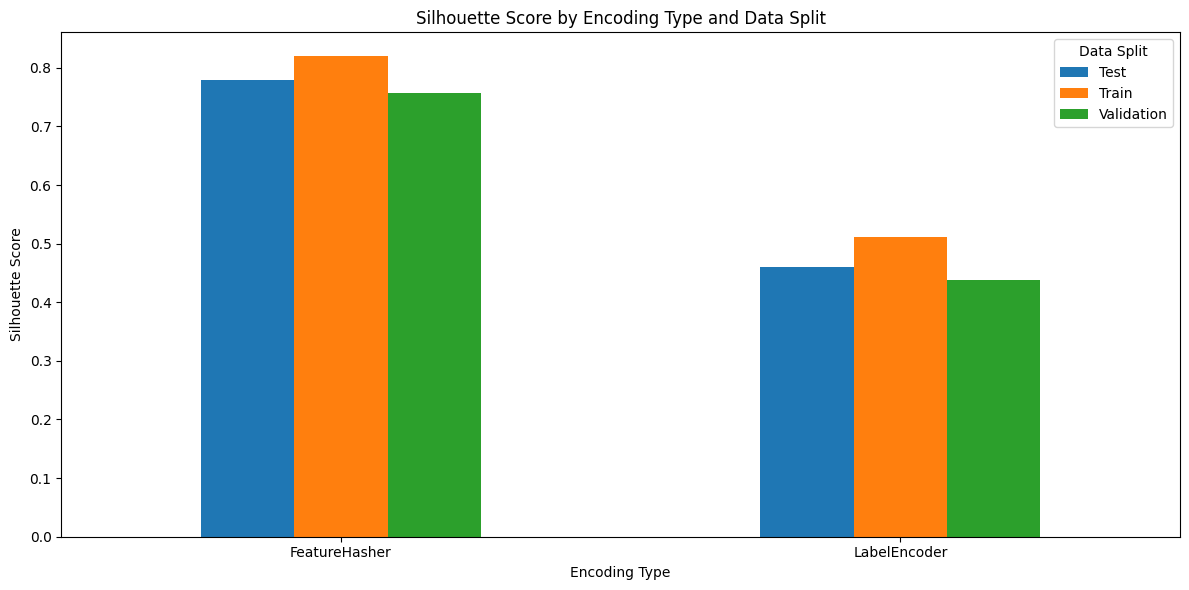

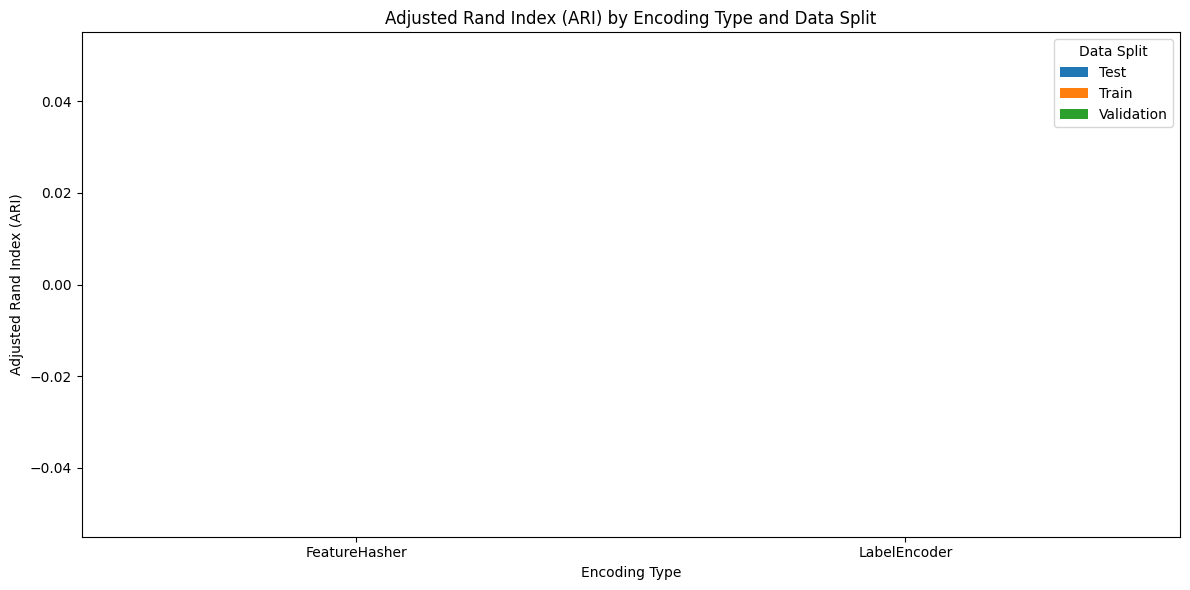

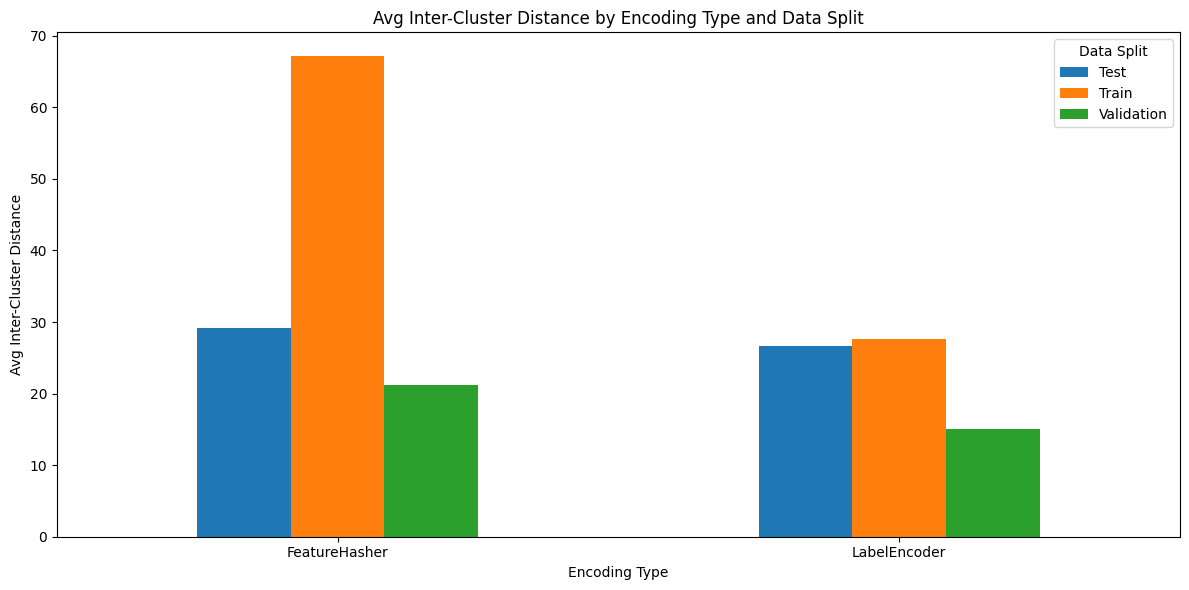

In [72]:
######################################################################################################################
# Main function
######################################################################################################################

if __name__ == '__main__':
    combined_results = main(df)